In [2]:
from synd.core import load_model
import matplotlib.pyplot as plt
import numpy as np

model = load_model('200ps_stuff/ntl9_folding_deshaw_vamp_200ps_1stride_lag1_7500states_full.synd')

Sum of TM: 7499.999999999978
[[  99   99   99 ...  973 6995  478]]
[[12.09169626 12.09169626 12.09169626 ...  0.99721745  1.04515709
   0.81116363]]


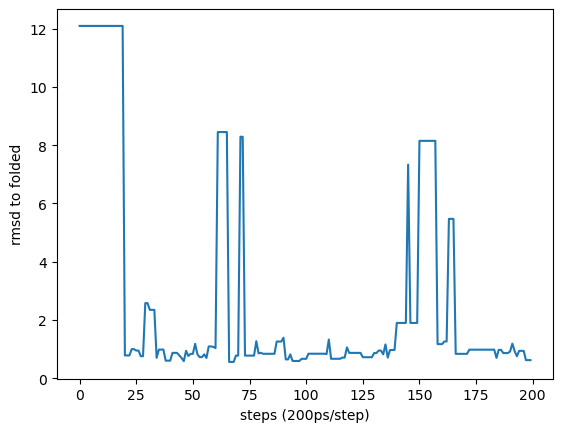

In [177]:
print(f'Sum of TM: {model.transition_matrix.sum()}')
trajectory = model.generate_trajectory(
    initial_states=np.array([99]),
    n_steps=20000
)
print(trajectory)
print(model.backmap(trajectory))

plt.xlabel('steps (200ps/step)')
plt.ylabel('rmsd to folded')
plt.plot(model.backmap(trajectory)[0][:200])
plt.show()


(array([ 52., 211., 359., 402., 407., 261., 189., 104.,  78.,  46.,  43.,
         27.,  24.,  23.,  20.,  13.,  19.,  18.,  22.,  13.,  23.,  20.,
         14.,  15.,  22.,  22.,  23.,  17.,  16.,  23.,  23.,  36.,  36.,
         36.,  32.,  29.,  42.,  43.,  47.,  50.,  52.,  53.,  54.,  45.,
         52.,  47.,  45.,  48.,  61.,  52.,  69.,  86.,  69., 103., 101.,
        129., 143., 129., 162., 151., 164., 151., 173., 169., 162., 209.,
        170., 183., 191., 173., 160., 149., 139., 145., 115., 103.,  70.,
         59.,  45.,  40.,  39.,  39.,  22.,  19.,   8.,  11.,  10.,   8.,
          6.,   1.,   1.,   4.,   2.,   5.,   1.,   1.,   0.,   0.,   1.,
          1.]),
 array([ 0.40487576,  0.52702164,  0.64916751,  0.77131339,  0.89345926,
         1.01560513,  1.13775101,  1.25989688,  1.38204276,  1.50418863,
         1.62633451,  1.74848038,  1.87062626,  1.99277213,  2.114918  ,
         2.23706388,  2.35920975,  2.48135563,  2.6035015 ,  2.72564738,
         2.84779325,  2.96

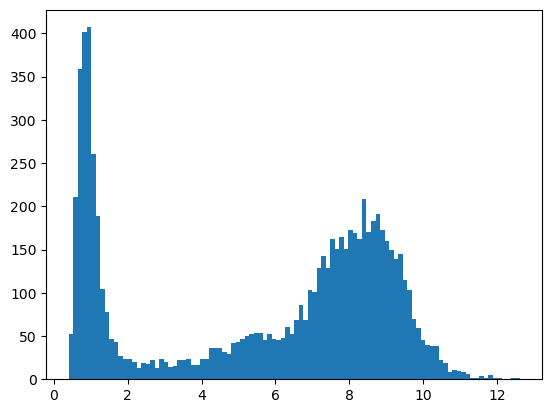

In [4]:
rmsd = model.backmap([i for i in range(7500)])
# Plot the RMSD as a histogram
plt.hist(rmsd, bins=100)

In [164]:
tmp = []
for x in range(7500):
    if rmsd[x] < 1:
        tmp.append(model.transition_matrix[99][x])
np.sum(tmp)


0.03333333327006814

In [118]:
model.transition_matrix[99][99]

0.966666666729932

In [130]:
# Test where the model goes after the bstates

for bstate in [99, 649, 1096]:
    print(f'Starting from state {bstate}')
    print("Probability : State ID : RMSD value")
    for x in range(7500):
        if model.transition_matrix[bstate][x] > 0:
            print(f'{model.transition_matrix[bstate][x]} : {x} : {rmsd[x]}')
    print('---')


Starting from state 99
Probability : State ID : RMSD value
0.966666666729932 : 99 : 12.09169626235962
0.004166675330372672 : 1423 : 0.782119631767273
0.008333316131232504 : 1801 : 0.8714403957128525
0.00416664986855221 : 2072 : 0.7498379796743393
0.008333353472154343 : 5075 : 0.8064835518598557
0.008333338467756416 : 7398 : 0.5874879285693169
---
Starting from state 649
Probability : State ID : RMSD value
0.6904761964703795 : 649 : 12.415361404418945
0.011904761331092356 : 1978 : 9.364410638809204
0.1309524259362508 : 3935 : 9.647923707962036
0.10714284015297987 : 4341 : 9.878900051116943
0.011904700051197557 : 5358 : 8.495143055915833
0.03571428973877141 : 5593 : 11.299854516983032
0.011904786319328467 : 7004 : 8.47152829170227
---
Starting from state 1096
Probability : State ID : RMSD value
0.9218750000612629 : 1096 : 12.619463205337524
0.0625000712293159 : 4727 : 11.256755590438843
0.015624928709421351 : 4876 : 0.980575680732727
---


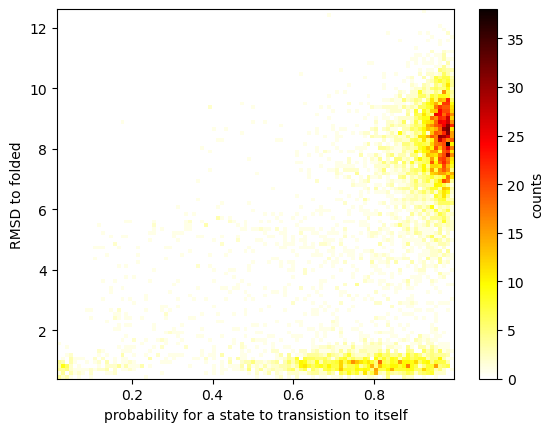

In [185]:
# Plot a 2D histogram of the probability of transitioning from one state to itself vs the rmsd value
plt.hist2d([model.transition_matrix[x][x] for x in range(7500)], rmsd, bins=100)
plt.set_cmap(('hot_r'))
plt.xlabel('probability for a state to transistion to itself')
plt.ylabel('RMSD to folded')
# Label the colorbar
plt.colorbar().set_label('counts')
plt.show()

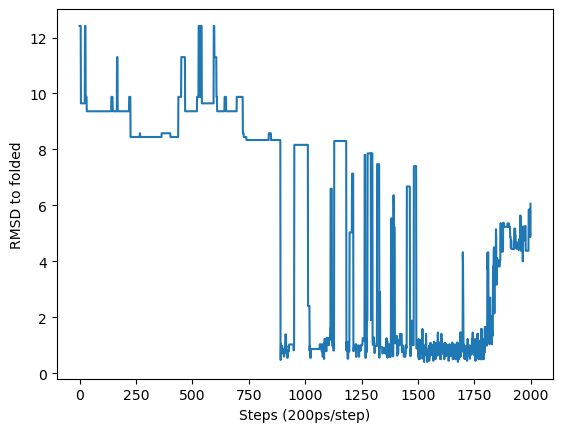

In [159]:
trajectory = model.generate_trajectory(
    initial_states=np.array([649]),
    n_steps=2000
)

backmap = model.backmap(trajectory)[0]

# Add x axis label
plt.xlabel('Steps (200ps/step)')
# Add y axis label
plt.ylabel('RMSD to folded')
plt.plot(backmap)
plt.show()

0.47642864286899567 - 8.336321115493774 = -7.859892472624779
8.164362907409668 - 0.9705090522766113 = 7.193853855133057
2.4001339077949524 - 8.164362907409668 = -5.764228999614716
1.2194294482469559 - 6.593493819236755 = -5.3740643709897995
8.301673531532288 - 0.8140584081411362 = 7.487615123391151
0.8140584081411362 - 8.301673531532288 = -7.487615123391151
0.7890920341014862 - 7.135120630264282 = -6.346028596162796
7.808361649513245 - 1.1614537239074707 = 6.646907925605774
0.551319420337677 - 7.808361649513245 = -7.257042229175568
7.859408259391785 - 1.8978816270828247 = 5.96152663230896
1.8978816270828247 - 7.859408259391785 = -5.96152663230896
7.859408259391785 - 1.8978816270828247 = 5.96152663230896
1.2176313996315002 - 7.859408259391785 = -6.641776859760284
7.4721938371658325 - 0.9705090522766113 = 6.501684784889221
0.5569151043891907 - 7.4721938371658325 = -6.915278732776642
6.359025835990906 - 0.6025294959545135 = 5.756496340036392
6.6756755113601685 - 0.9047569334506989 = 5.770

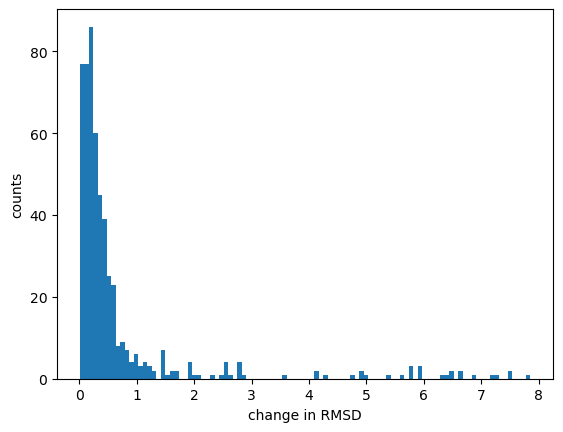

In [188]:
# Test large jumps in the backmap
temp = []
count = 0
for idx in range(1, len(backmap)):
    if abs(backmap[idx] - backmap[idx-1]) > 5:
        print(f'{backmap[idx]} - {backmap[idx-1]} = {backmap[idx] - backmap[idx-1]}')
    if abs(backmap[idx] - backmap[idx-1]) > 0:
        temp.append(abs(backmap[idx] - backmap[idx-1]))
    else:
        count += 1

print(
    f'max: {max(temp)}',
    f'min: {min(temp)}',
    f'mean: {np.mean(temp)}',
    f'std: {np.std(temp)}',
    f'zero count: {count}'
)
# Plot the change in rmsd as a histogram
plt.xlabel('change in RMSD')
plt.ylabel('counts')
plt.hist(temp, bins=100)
plt.show()